In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

os.chdir('../')
import data 
os.chdir('notebooks')

2023-01-23 15:54:36.173051: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [7]:
target = data.clean_data('../../data/transactions.parquet')
target = target.iloc[1064:1500,:5]

In [8]:
target

,(02000) cabecera autopista norte,(02001) centro comercial santa fe,(02101) toberin,(02102) calle 161,(02103) mazuren
timestamp,,,,,
2015-08-15 04:00:00,0.0,0.0,0.0,0.0,0.0
2015-08-15 04:15:00,0.0,0.0,0.0,0.0,0.0
2015-08-15 04:30:00,24.0,0.0,0.0,0.0,0.0
2015-08-15 04:45:00,173.0,0.0,18.0,1.0,2.0
2015-08-15 05:00:00,367.0,0.0,32.0,2.0,10.0
...,...,...,...,...,...
2015-08-20 16:45:00,1958.0,0.0,333.0,148.0,498.0
2015-08-20 17:00:00,2542.0,0.0,624.0,235.0,503.0
2015-08-20 17:15:00,3108.0,0.0,701.0,258.0,518.0


In [10]:
# mean = 188.4318877714359
# variance = 120971.63484231419
# stdd = np.sqrt(variance)

df = pd.read_parquet('../outputs/predictions_small_expt1.parquet')
df
# df = (df * stdd) + mean
# df = df.where(df > 0, 0)

,(02000) cabecera autopista norte,(02001) centro comercial santa fe,(02101) toberin,(02102) calle 161,(02103) mazuren
timestamp,,,,,
2015-08-15 04:00:00,383.0,86.0,86.0,80.0,80.0
2015-08-15 04:15:00,390.0,89.0,89.0,81.0,81.0
2015-08-15 04:30:00,408.0,93.0,92.0,82.0,81.0
2015-08-15 04:45:00,457.0,97.0,97.0,84.0,82.0
2015-08-15 05:00:00,528.0,101.0,102.0,86.0,84.0
...,...,...,...,...,...
2015-08-20 16:45:00,1635.0,87.0,143.0,85.0,105.0
2015-08-20 17:00:00,1650.0,86.0,151.0,85.0,105.0
2015-08-20 17:15:00,1696.0,86.0,158.0,84.0,106.0


In [11]:
def _validate_target_predicted(target, predicted):
    """
    Validates target and predicted data. Both arguments 
    must have the same shape. If argument is a DataFrame, 
    this function converts it to a numpy array. 
    """
    
    if isinstance(target, pd.DataFrame) or isinstance(target, pd.Series):
        target = target.values
        
    if isinstance(predicted, pd.DataFrame) or isinstance(predicted, pd.Series):
        predicted = predicted.values
    
    assert isinstance(target, np.ndarray)
    assert isinstance(predicted, np.ndarray)
    assert target.shape == predicted.shape
    
    return target, predicted

def MAAPE(target, predicted, axis = None):
    """ Mean Abosulute Arctangent Percentual Error """
    target, predicted = _validate_target_predicted(target, predicted)
    
    return np.arctan(np.abs((target - predicted)/(target + 1e-9))).mean(axis = axis)

def wMAPE(target, predicted, axis = None):
    """ Weighted Mean Abosulute Percentual Error """
    target, predicted = _validate_target_predicted(target, predicted)
    
    num = np.abs(target - predicted).sum(axis = axis)
    dem = np.abs(target).sum(axis = axis)
    return num/dem

def sMAPE(target, predicted, axis = None):
    """ symetric Mean Abosulute Percentual Error """
    target, predicted = _validate_target_predicted(target, predicted)
    
    num = np.abs(target-predicted)
    dem = np.abs(target) + np.abs(predicted)
    return np.nan_to_num(num/dem).mean(axis = axis)

def bootstrap_std(target, predicted, func):
    """ Bootsrap function to estimate the standard error of 'func'
    
    Parameters: 
    - target: 1-d array-like. Target data of size n
    - predicted: 1-d array-like. Predicted data of size n
    - func: func. inputs of the function are target, predicted and axis. 
    
    Return: 
    estimated standard error of 'func' via bootstrap. 
    """
    target, predicted = _validate_target_predicted(target, predicted)
    target = target.flatten()
    predicted = predicted.flatten()
    
    indices = np.random.choice(target.size, size = (1000,1000), replace=True)
    target_sample = target[indices]
    predicted_sample = predicted[indices]
    
    return func(target_sample, predicted_sample, axis = 1).std()

def summary_erros(target, predictions):
    """
    Summary table for accuracy metrics
    
    Parameters:
    - target: 
    - predictions: list. List of dataframes. Each dataframe 
                   must contain df.name where name is the the 
                   model where the prediction is from. 
    """
    
    assert isinstance(predictions, list)
    error_list = [MAAPE, wMAPE, sMAPE]
    error_name = ['MAAPE', 'wMAPE', 'sMAPE']
    results = {}
    
    for p in predictions:
        model = p.name
        error_dict = {}
        for func, name in zip(error_list, error_name):
            error = func(target, p)
            std = bootstrap_std(target, p, func)
            error_dict[name] = "{:.2f} (\u00B1{:.3f})".format(error,1.96*std)
        
        results[model] = error_dict
        
    print(pd.DataFrame(results).T.style.to_latex(caption = 'Summary accuracy metrics', 
                                                 position_float='centering', 
                                                 hrules = True))
    
    
def error_plots(target, predictions, stations, start_date, end_date, func, func_name, 
                 rolling_period = 76):
    
    # Estimate error of stations
    results = []
    for station in stations: 
        df_dict = {}
        for prediction in predictions:
            prediction_name = prediction.name
            values = func(target[[station]], prediction[[station]], axis = 1)
            df_dict[prediction_name] = values

        df = pd.DataFrame(df_dict, index = target.index)
        df.name = station
        results.append(df)
        
    #Plot
    fig, axs = plt.subplots(nrows = len(results), figsize = (20,20))
    for i, s in enumerate(results):
        s[start_date:end_date].rolling(rolling_period).mean().plot(ax = axs[i])
        axs[i].set_title(s.name, fontsize = 20)
        axs[i].set_xlabel('')
        axs[i].set_ylabel(func_name, fontsize = 20)
        axs[i].tick_params(labelrotation=0)
        
def target_prediction_plot(target, prediction, stations, start_date, end_date):
    
    fig, axs = plt.subplots(nrows = len(stations), figsize = (20,20))
    
    for i, station in enumerate(stations):
        target[station][start_date:end_date].plot(ax = axs[i], legend = True, label = 'Target')
        prediction[station][start_date:end_date].plot(ax = axs[i], 
                                                      legend = True, 
                                                      label = 'Prediction: {}'.format(prediction.name))
        axs[i].set_title(station, fontsize = 20)
        axs[i].set_xlabel('')
        axs[i].set_ylabel('Demand', fontsize = 20)
        axs[i].tick_params(labelrotation=0)

In [12]:
stable_target = target#[83296:127000]
stable_predicted = df #[83296:127000]
stable_predicted.name = "transaformer_stable"

summary_erros(stable_target, [stable_predicted])

\begin{table}
\centering
\caption{Summary accuracy metrics}
\begin{tabular}{llll}
\toprule
 & MAAPE & sMAPE & wMAPE \\
\midrule
transaformer_stable & 0.76 (±0.036) & 0.44 (±0.023) & 0.46 (±0.036) \\
\bottomrule
\end{tabular}
\end{table}



In [13]:
# stable_target = target[83296:127000]
# stable_predicted = df[83296:127000]
# stable_predicted.name = "transaformer_stable"

# summary_erros(stable_target, [stable_predicted])

In [14]:
# covid_target = target[127000:]
# covid_predicted = df[127000:]
# covid_predicted.name = "transaformer_stable"

# summary_erros(covid_target, [covid_predicted])

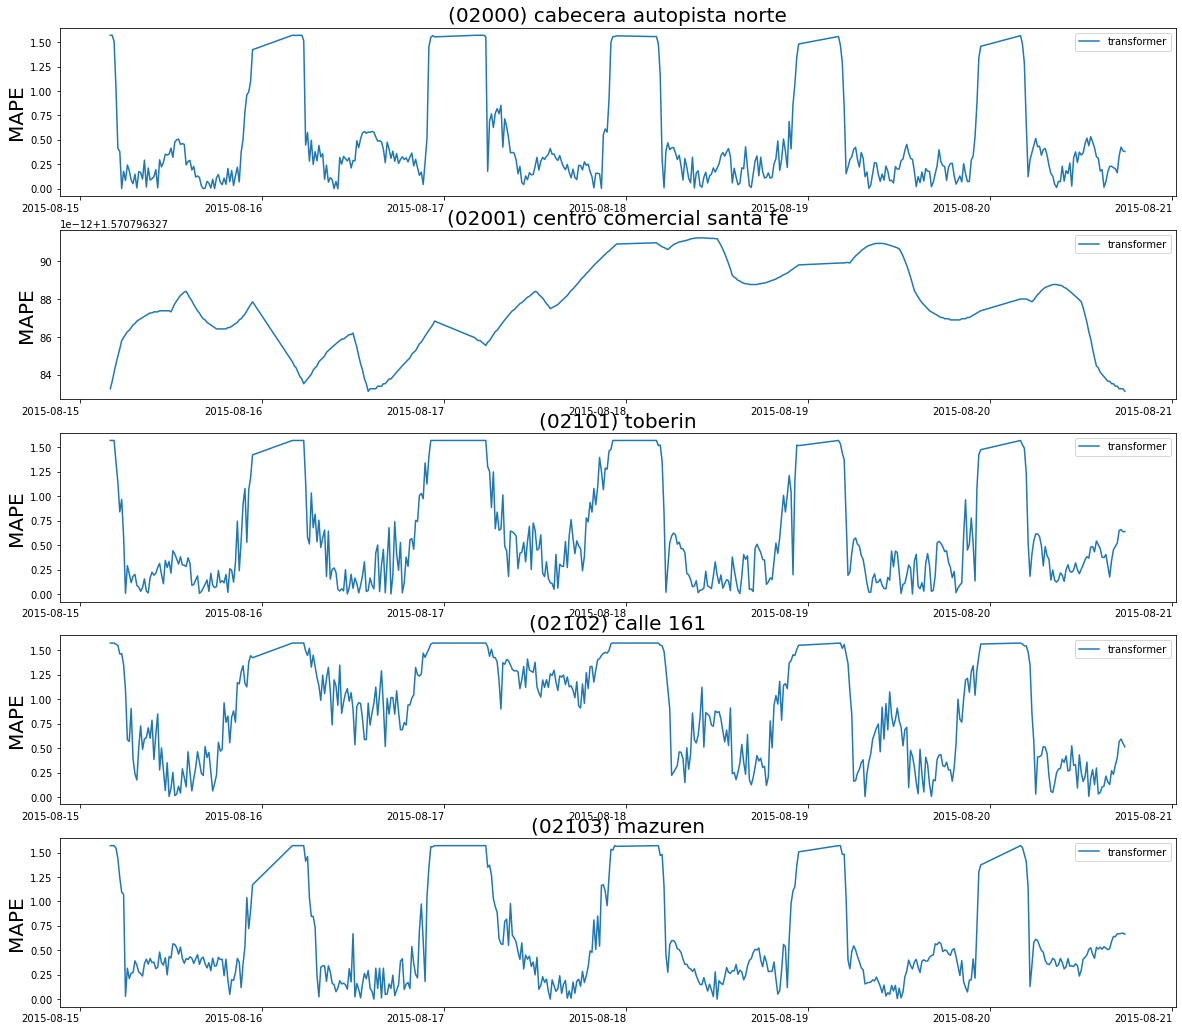

In [17]:
stations = ['(09110) avenida jimenez','(14004) museo del oro', '(14005) las aguas']
errors = [MAAPE, wMAPE, sMAPE]
errors_name = ['MAAPE', 'wMAPE', 'sMAPE']
models = [df]
df.name = "transformer"

# error_plots(target, df, stations, start_date, end_date, func, func_name, 
#                  rolling_period = 76)

# error_plots(target, 
#             predictions = [df],
#             stations = ['(09110) avenida jimenez','(14004) museo del oro', '(14005) las aguas'],
#             start_date = '2016-08-25', 
#             end_date = '2016-09-10',
#             func = MAAPE, 
#             func_name = 'MAPE', 
#             rolling_period = 1,
#            )

error_plots(target, 
            predictions = [df],
            stations = df.columns,
            start_date = '2015-08-15', 
            end_date = '2015-08-21',
            func = MAAPE, 
            func_name = 'MAPE', 
            rolling_period = 1,
           )

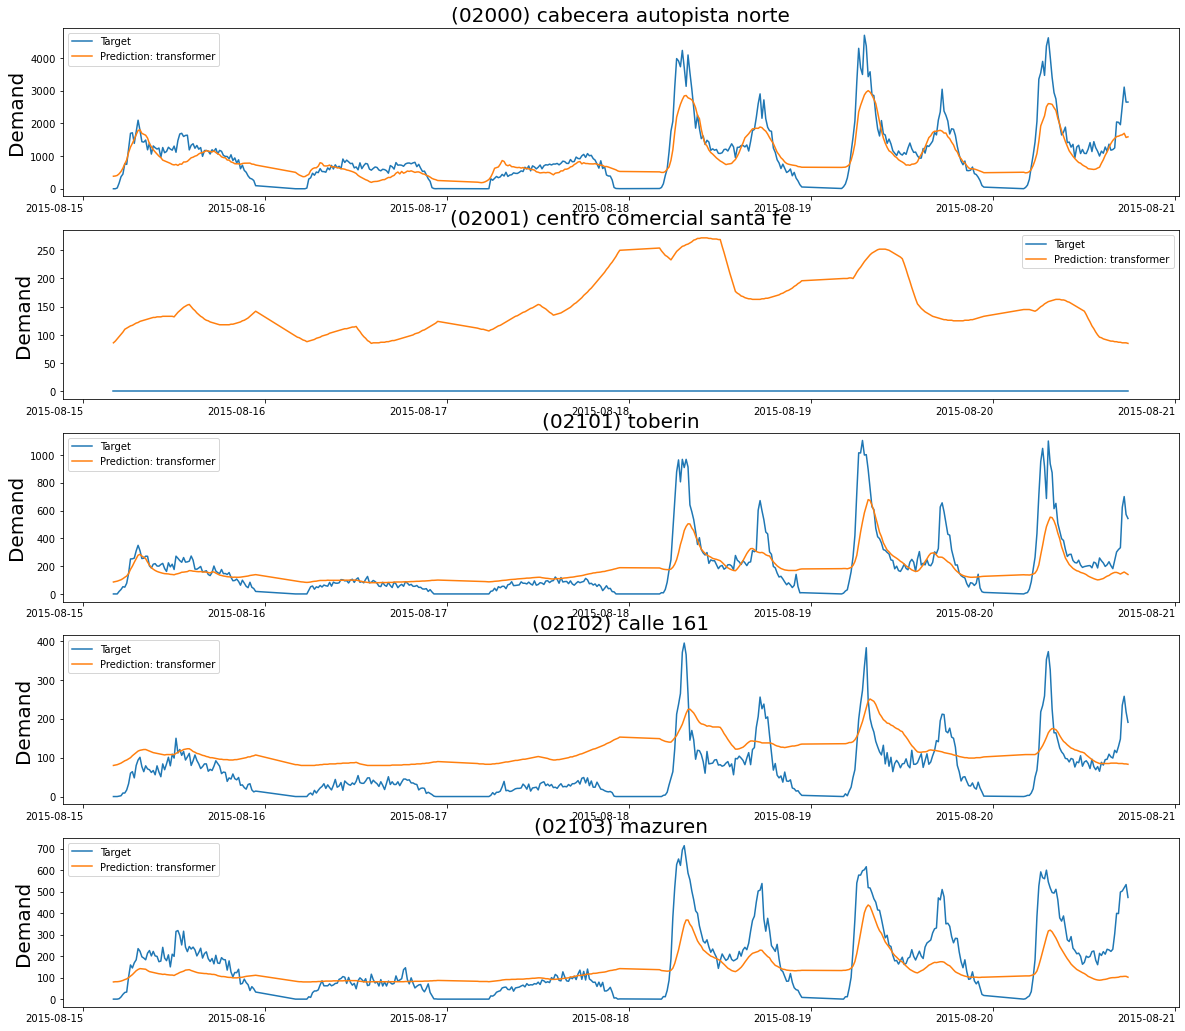

In [18]:
# stations = ['(09110) avenida jimenez','(14004) museo del oro', '(14005) las aguas']
# errors = [MAAPE, wMAPE, sMAPE]
# errors_name = ['MAAPE', 'wMAPE', 'sMAPE']
# # models = [r1,r2,r3]
# df.name = "transformer"

# target_prediction_plot(target, 
#                        df, 
#                        stations, 
#                        start_date = '2016-08-25', 
#                        end_date = '2016-09-10')

stations = df.columns
errors = [MAAPE, wMAPE, sMAPE]
errors_name = ['MAAPE', 'wMAPE', 'sMAPE']
# models = [r1,r2,r3]
df.name = "transformer"

target_prediction_plot(target, 
                       df, 
                       stations, 
                       start_date = '2015-08-15', 
                       end_date = '2015-08-21')